In [2]:
import ROOT as root
import numpy as np
from array import array
import matplotlib.pyplot as plt
import time

In [3]:
f1 = root.TFile("Run2012BC_DoubleMuParked_Muons.root","READ")
t1 = f1.Get("Events")

h = root.TH1D('h','h', 30000, 0.25, 160)

print(type(f1))
print(type(t1))
print(type(h))

print("\nTotal no. of events : ",t1.GetEntries())

<class cppyy.gbl.TFile at 0x55b515288f00>
<class cppyy.gbl.TTree at 0x55b515570780>
<class cppyy.gbl.TH1D at 0x55b517afc560>

Total no. of events :  61540413


In [4]:
import ROOT

def print_leaves(tree):
    for branch in tree.GetListOfBranches():
        print(branch.GetName())

# Open the ROOT file
file = ROOT.TFile("Run2012BC_DoubleMuParked_Muons.root")

# Access the tree or chain
tree = file.Get("Events")

# Print the leaves
print_leaves(tree)

# Close the file
file.Close()


nMuon
Muon_pt
Muon_eta
Muon_phi
Muon_mass
Muon_charge


In [6]:
p = float(input("% of total events(100%) to be examined(give any integer) :"))

% of total events(100%) to be examined(give any integer) :1


In [7]:
n = int(p*t1.GetEntries()/100)
print("no. of events selected : ",n)

no. of events selected :  615404


In [5]:
#n = 1000

In [6]:
A = np.zeros((2*n, 3))
B = np.zeros((2*n, 3))

In [ ]:
# for i,ent in enumerate(t1):
#     if i>n:break;
#     if (i > 0 and i%100000 == 0): print("Processing: ", i, "th event!")

#     if nMuon != 2: continue
    
#     u_charge = list(ent.Muon_charge)
#     if u_charge[0] * u_charge[1] >= 0: continue
    
#     u_pt = list(ent.Muon_pt)
#     u_eta = list(ent.Muon_eta)
#     u_phi = list(ent.Muon_phi)
#     u_mass = list(ent.Muon_mass)
    
#     u1P4 = root.TLorentzVector()
#     u1P4.SetPtEtaPhiM(u_pt[0],u_eta[0],u_phi[0],u_mass[0])
    
#     u2P4 = root.TLorentzVector()
#     u2P4.SetPtEtaPhiM(u_pt[1],u_eta[1],u_phi[1],u_mass[1])
    
#     dr = u1P4.DeltaR(u2P4)
#     mP4 = u1P4 + u2P4

In [7]:
start = time.time()

for i,ent in enumerate(t1):
    if i>n:break;
    if (i > 0 and i%100000 == 0): print("Processing: ", i, "th event!")
    
    u_chrg = np.array(ent.Muon_charge)
    u_no = np.array(ent.nMuon)
    
    if len(u_chrg)==2 and u_no==2 and (u_chrg[0]+u_chrg[1] ==0):
        
        u_pt = list(ent.Muon_pt)
        u_eta = list(ent.Muon_eta)
        u_phi = list(ent.Muon_phi)
        u_mass = list(ent.Muon_mass)
        
        u1LV = root.TLorentzVector()
        u1LV.SetPtEtaPhiM(u_pt[0],u_eta[0],u_phi[0],u_mass[0])
        #u1LV = root.Math.PtEtaPhiMVector(u_pt[0],u_eta[0],u_phi[0],u_mass[0])
        A[i][0] = u1LV.Px()
        A[i][1] = u1LV.Py()
        A[i][2] = u1LV.Pz()
        
        u2LV = root.TLorentzVector()
        u2LV.SetPtEtaPhiM(u_pt[1],u_eta[1],u_phi[1],u_mass[1])
        #u2LV = root.Math.PtEtaPhiMVector(u_pt[1],u_eta[1],u_phi[1],u_mass[1])
        B[i][0] = u2LV.Px()
        B[i][1] = u2LV.Py()
        B[i][2] = u2LV.Pz()
        
        Z_LV = u1LV + u2LV
        mass = Z_LV.M()
        h.Fill(mass)

print ("Loop is completed")
end = time.time()
print(end-start)


Processing:  100000 th event!
Processing:  200000 th event!
Processing:  300000 th event!
Processing:  400000 th event!
Processing:  500000 th event!
Processing:  600000 th event!
Loop is completed
29.898754119873047


In [8]:
#A

In [9]:
#B

In [10]:
C = np.vstack((A, B))
C

array([[ 0.        ,  0.        ,  0.        ],
       [10.14310332, -2.85958612, -4.64691517],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [11]:
print(u1LV.Px())
print(u2LV.Px())

4.695758214956813
-41.52182949735098


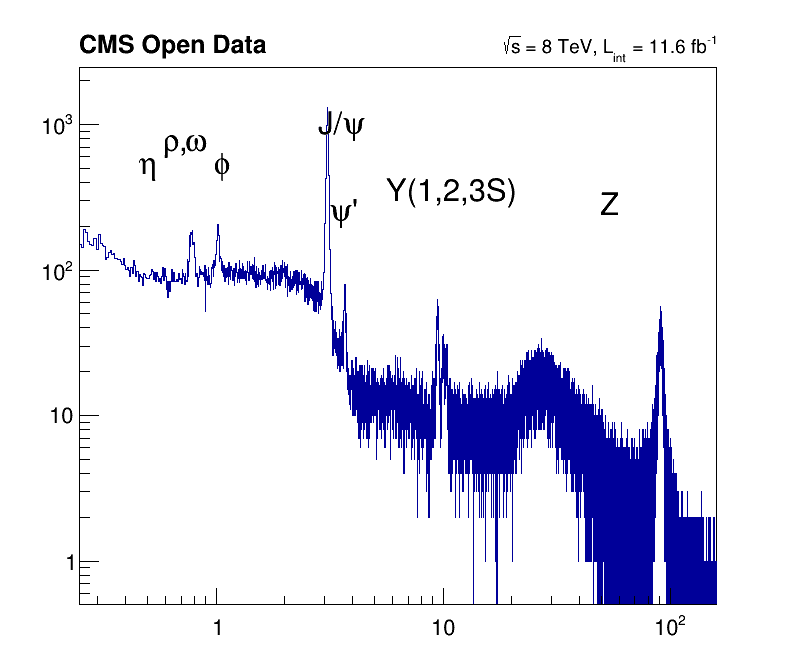

In [12]:
import ROOT

# Produce plot
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTextFont(42)
c = ROOT.TCanvas("c", "", 800, 700)
c.SetLogx(); c.SetLogy()
 
h.SetTitle("")
h.GetXaxis().SetTitleSize(0.04)
h.GetYaxis().SetTitleSize(0.04)
h.Draw()
 
label = ROOT.TLatex()
label.SetNDC(True)
label.DrawLatex(0.175, 0.740, "#eta")
label.DrawLatex(0.205, 0.775, "#rho,#omega")
label.DrawLatex(0.270, 0.740, "#phi")
label.DrawLatex(0.400, 0.800, "J/#psi")
label.DrawLatex(0.415, 0.670, "#psi'")
label.DrawLatex(0.485, 0.700, "Y(1,2,3S)")
label.DrawLatex(0.755, 0.680, "Z")
label.SetTextSize(0.040)
label.DrawLatex(0.100, 0.920, "#bf{CMS Open Data}")
label.SetTextSize(0.030)
label.DrawLatex(0.630, 0.920, "#sqrt{s} = 8 TeV, L_{int} = 11.6 fb^{-1}")
c.Draw()

In [13]:
D = C
print(len(D))
print(np.shape(D))
D

2461616
(2461616, 3)


array([[ 0.        ,  0.        ,  0.        ],
       [10.14310332, -2.85958612, -4.64691517],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [21]:
D[np.abs(D)< 100]= 0 # some zeros

In [22]:
print(D)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [23]:
# D[np.abs(D)< 0.5]= 0 # some zeros
# D = np.ma.masked_equal(D,0)

In [24]:
D

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
E = [row for row in D if any(row)]

In [26]:
E

[array([  0.        ,   0.        , 203.95134213]),
 array([  0.        ,   0.        , 104.70630615]),
 array([  0.        ,   0.        , 194.68306469]),
 array([   0.        ,    0.        , -304.76774433]),
 array([  0.        ,   0.        , 232.29820201]),
 array([  0.        ,   0.        , 116.05280424]),
 array([  0.      ,   0.      , 114.178881]),
 array([   0.        ,    0.        , -157.60940927]),
 array([  0.        ,   0.        , 168.06686019]),
 array([  0.       ,   0.       , 128.9946481]),
 array([   0.        ,    0.        , -153.44468477]),
 array([  0.        ,   0.        , 104.56616718]),
 array([  0.        ,   0.        , 127.63386903]),
 array([  0.       ,   0.       , 157.2038358]),
 array([   0.        ,    0.        , -114.66673777]),
 array([  0.        ,   0.        , 245.21302259]),
 array([   0.       ,    0.       , -105.8647513]),
 array([  0.        ,   0.        , 100.38030192]),
 array([  0.        ,   0.        , 189.85789012]),
 array([   0

In [27]:
np.shape(E)

(26642, 3)

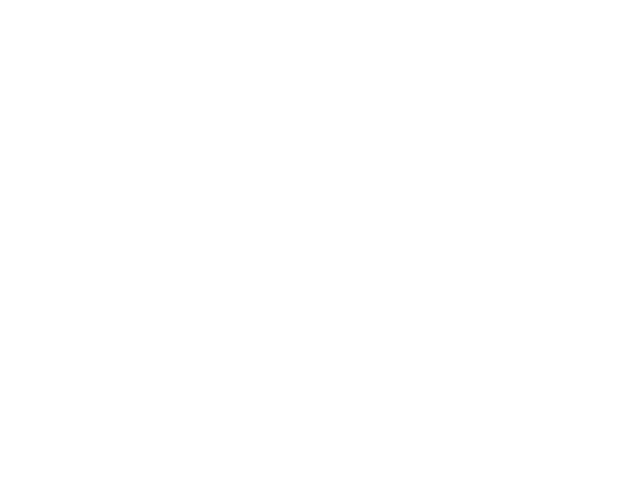

In [28]:
import matplotlib.pyplot as plt  # conventional short name for Matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
#%matplotlib notebook
fig = plt.figure()


In [29]:
def cms_outline(ax):
    z = np.linspace(-20000, 20000, 500)
    theta = np.linspace(0, 2 * np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 10000 * np.cos(theta_grid)
    y_grid = 10000 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

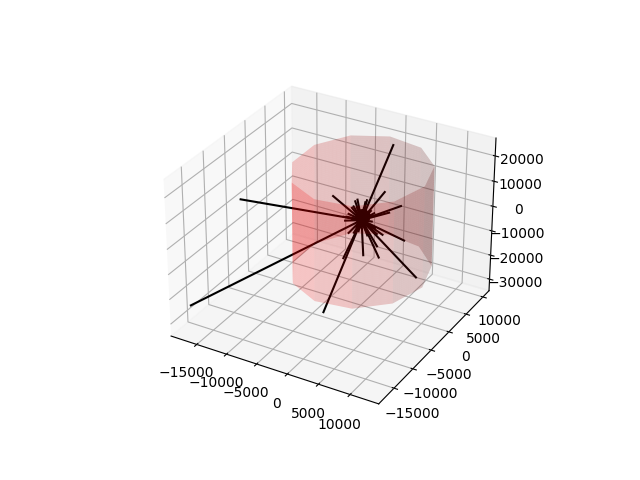

In [30]:
fig.clf()  # clear figure
ax = fig.add_subplot(111, projection="3d")
for x, y, z in E:
    # make a black line from (0, 0, 0) to (x, y, z)
    ax.plot([0, x], [0, y], [0, z], c="black")
cms_outline(ax)
plt.show()

In [7]:
f2 = root.TFile("Tag_Probe_Invariant_Mass.root", "RECREATE")
h.Write()
f2.Write()
f2.Close()